In this notebook I make a series of tests that give a rough ideia of the noise present in the `ibmq_manila` quantum computer.

# Imports

In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import MCMT
import qiskit.tools.jupyter

# Provider and backends

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [3]:
backend_sim = Aer.get_backend('qasm_simulator')
backend_qc = provider.get_backend('ibmq_manila')
backend_qc_sim = QasmSimulator.from_backend(backend_qc)

# Noise in ibmq_manila

The test that is performed here is the following: given a circuit, we run it on `qasm_simulator` and from the counts dictionary that it returns we see what basis states are observed. After that, we run it on a quantum computer, and from the returned counts we determine the probability of measuring a basis state that is not measured in the simulator. 

These functions may seem unecessarily complicated for the gates we tested here, but they run fast and can be used in the same way for more complicated circuits.

In [4]:
def bit_index(s):
    return int(s, 2)

def prob_array(counts):
    n_qubits = len(list(counts.keys())[0])
    shots = sum(list(counts.values()))
    probs = np.zeros(2**n_qubits)
    
    for key, value in counts.items():
        probs[bit_index(key)] = value/shots
    return probs

def bit_error(qc, counts):
    job_sim = execute(qc, backend=backend_sim, shots=20000)
    counts_sim = job_sim.result().get_counts()
    correct_basis_states = list(counts_sim.keys())
    correct_ints = list(map(bit_index, correct_basis_states))
    print(f'prob of bit error is {np.sum(np.delete(prob_array(counts), correct_ints))*100:.2f}%')

In [5]:
job = backend_qc.retrieve_job('61ca227273db89feab67596c')
measure1_cs, measure2_cs, measure3_cs, measure4_cs, measure5_cs, t1_cs, t2_cs, t3_cs, t4_cs = job.result().get_counts()

Measures only.

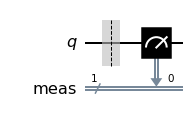

In [6]:
measure1 = QuantumCircuit(1)
measure1.measure_all()
measure1.draw()

In [7]:
bit_error(measure1, measure1_cs)

prob of bit error is 3.19%


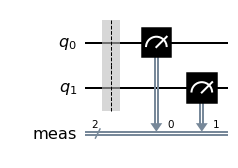

In [8]:
measure2 = QuantumCircuit(2)
measure2.measure_all()
measure2.draw()

In [9]:
bit_error(measure2, measure2_cs)

prob of bit error is 6.87%


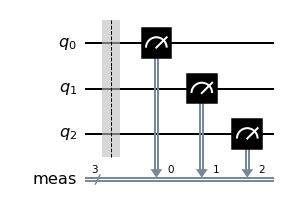

In [10]:
measure3 = QuantumCircuit(3)
measure3.measure_all()
measure3.draw()

In [11]:
bit_error(measure3, measure3_cs)

prob of bit error is 8.28%


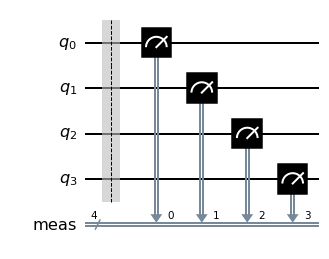

In [12]:
measure4 = QuantumCircuit(4)
measure4.measure_all()
measure4.draw()

In [13]:
bit_error(measure4, measure4_cs)

prob of bit error is 9.33%


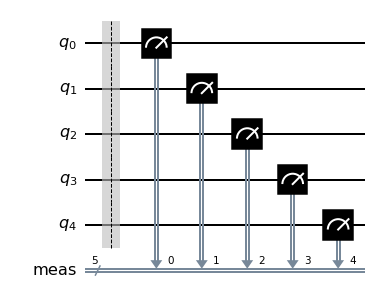

In [14]:
measure5 = QuantumCircuit(5)
measure5.measure_all()
measure5.draw()

In [15]:
bit_error(measure5, measure5_cs)

prob of bit error is 9.60%


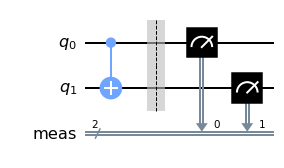

In [16]:
t1 = QuantumCircuit(2)
t1.cx(0, 1)
t1.measure_all()
t1.draw()

In [17]:
bit_error(t1, t1_cs)

prob of bit error is 6.75%


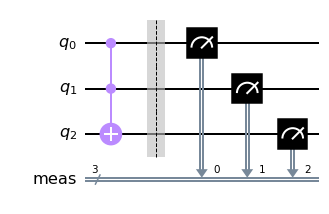

In [18]:
t2 = QuantumCircuit(3)
t2.compose(MCMT('x', 2, 1), inplace=True)
t2.measure_all()
t2.draw()

In [19]:
bit_error(t2, t2_cs)

prob of bit error is 16.98%


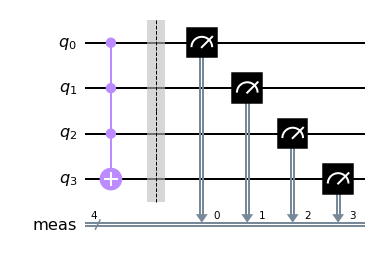

In [20]:
t3 = QuantumCircuit(4)
t3.compose(MCMT('x', 3, 1), inplace=True)
t3.measure_all()
t3.draw()

In [21]:
bit_error(t3, t3_cs)

prob of bit error is 29.05%


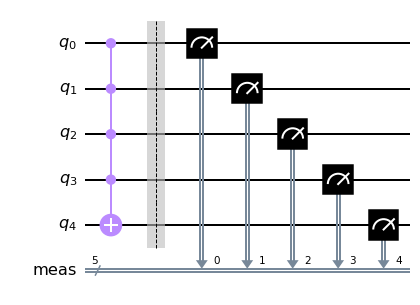

In [22]:
t4 = QuantumCircuit(5)
t4.compose(MCMT('x', 4, 1), inplace=True)
t4.measure_all()
t4.draw()

In [23]:
bit_error(t4, t4_cs)

prob of bit error is 77.15%


In [24]:
%qiskit_version_table